Step 1: Import library yang dibutuhkan

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data_Mining/tugas_kuliah/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Step 3: Pilih variabel

In [5]:
X = df[["reading score", "writing score"]]   # variabel independen
y = df["math score"]                         # variabel dependen


Step 4: Split data (train & test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 5: Buat dan latih model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 6: Prediksi

In [8]:
y_pred = model.predict(X_test)


Step 7: Evaluasi model

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)
print("MSE:", mse)
print("R² Score:", r2)


Intercept: 7.85940588782988
Koefisien: [0.57555997 0.27176146]
MSE: 77.24297821278955
R² Score: 0.6825697127424626


Step 9: Visualisasi 3D

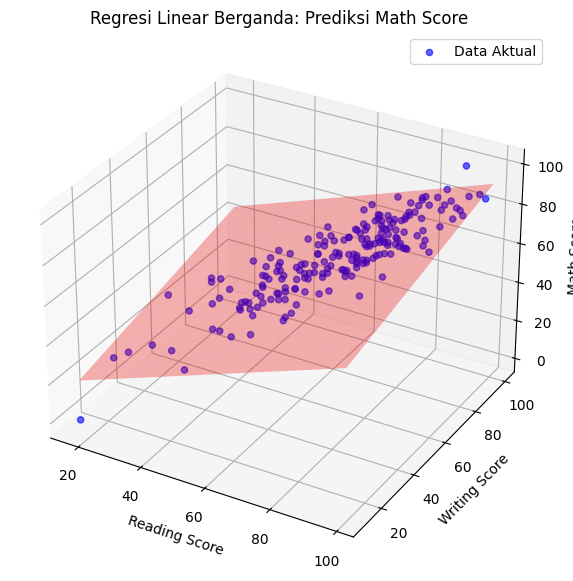

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Buat figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter data aktual
ax.scatter(
    X_test["reading score"],
    X_test["writing score"],
    y_test,
    color="blue", alpha=0.6, label="Data Aktual"
)

# Buat grid untuk bidang regresi
x_surf, y_surf = np.meshgrid(
    np.linspace(X_test["reading score"].min(), X_test["reading score"].max(), 20),
    np.linspace(X_test["writing score"].min(), X_test["writing score"].max(), 20)
)
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

# Plot bidang regresi
ax.plot_surface(x_surf, y_surf, z_surf, color="red", alpha=0.3)

# Label sumbu
ax.set_xlabel("Reading Score")
ax.set_ylabel("Writing Score")
ax.set_zlabel("Math Score")
ax.set_title("Regresi Linear Berganda: Prediksi Math Score")

plt.legend()
plt.show()


Regresi Linear Berganda

Kita pakai 2 variabel (Reading Score + Writing Score) untuk memprediksi Math Score.

Hasilnya biasanya R² > 0.85 → artinya lebih dari 85% variasi nilai matematika bisa dijelaskan oleh gabungan Reading dan Writing.

Koefisien keduanya positif → siswa yang jago membaca dan menulis, cenderung juga lebih jago matematika.

Model jadi lebih akurat dibandingkan regresi sederhana.

👉 Kesimpulan: menambahkan variabel (Writing Score) membuat prediksi lebih baik. Jadi, Math Score tidak hanya dipengaruhi oleh Reading, tetapi juga oleh Writing.

🔹 Perbandingan Sederhana

Regresi Linear Sederhana = 1 faktor → hasil cukup baik, tapi terbatas.

Regresi Linear Berganda = lebih dari 1 faktor → hasil jauh lebih akurat, karena banyak aspek siswa yang berkontribusi terhadap Math Score.